# Анализ рынка

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from itertools import chain


In [32]:
df = pd.read_csv('correct_data.csv', parse_dates=['date'])
df.head()

,date,se,browser,hits,hits_fixed,hits_week_trend,hits_week_seasonal,hits_year_trend,hits_year_seasonal
0,2014-01-01,search,chrome,44778823.0,44778823.0,49612486.0,48984981.0,55226361.0,52950126.0
1,2014-01-01,yandex,chrome,16237589.0,16237589.0,17897257.0,17795981.0,21723415.0,20335246.0
2,2014-01-02,search,chrome,52448725.0,52448725.0,51171924.0,52391145.0,55223577.0,53508809.0
3,2014-01-02,yandex,chrome,18979110.0,18979110.0,18572766.0,19087406.0,21719025.0,20563998.0
4,2014-01-03,search,chrome,54640145.0,54640145.0,52731362.0,53220033.0,55220792.0,54312211.0


In [67]:
## Как менялась доля Яндекса

In [3]:
se_d = df.groupby(['date', 'browser']).sum().reset_index(level=1)
se_d.head()

,browser,hits,hits_fixed,hits_week_trend,hits_week_seasonal,hits_year_trend,hits_year_seasonal
date,,,,,,,
2014-01-01,chrome,61016412.0,61016412.0,67509743.0,66780962.0,76949776.0,73285372.0
2014-01-01,firefox,25883118.0,25883118.0,28052573.0,28259641.0,34498694.0,31584398.0
2014-01-01,msie,11395139.0,11395139.0,11793613.0,12565413.0,20747224.0,17397986.0
2014-01-01,opera,20405407.0,20405407.0,23325921.0,22999143.0,27340088.0,26380415.0
2014-01-01,yabrowser,16947495.0,16947495.0,19044248.0,18639494.0,21510035.0,21007987.0


На графике изображено как менялась доля яндекса в разных поисковиках
Про Opera сложно что-то сказать
Доля Яндекса в яндекс браузере все время высокая
Доля в explore хроме уменьшалась в 2016 но выровнялась к 2017
Доля в FireFox браузере заметно упала

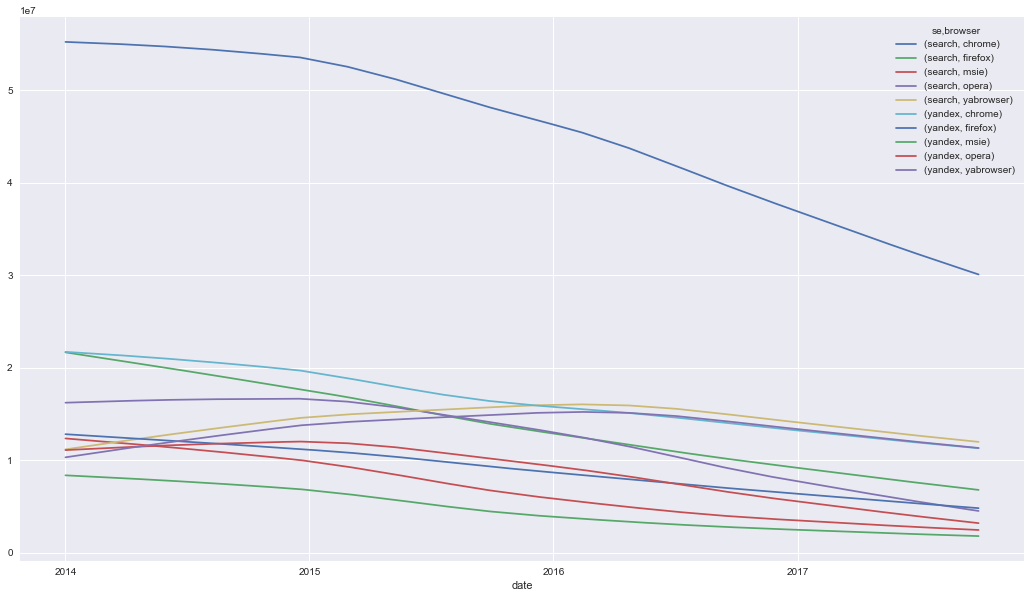

In [38]:
df.pivot_table(index='date', values='hits_year_trend', 
                    columns=['se', 'browser'], aggfunc=np.sum).plot()

## Доля браузера по поисковой тарификации

Рассмотрим долю суммы по поисковикам траффика браузера в процентах

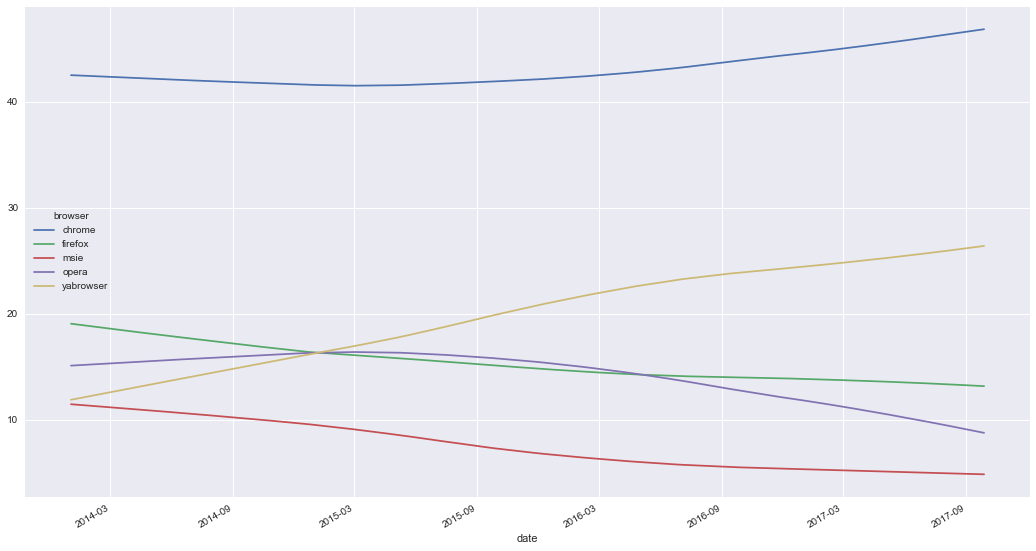

In [44]:
plot = df.pivot_table(index='date', values='hits_year_trend', 
                    columns='browser', aggfunc=np.sum, margins=True)
plot = (plot.iloc[:-1, :-1].div(plot.iloc[:-1, -1], axis=0) * 100)
pt.plot()

In [ ]:
browsers = data.groupby(['date', 'browser']).sum().reset_index(level=1)
browsers.head()

Видно что доля только двух браузеров растет -- это Яндекс и Хром

## Доля яндекса 

In [47]:
browser_y = df.groupby(['date', 'se']).sum().reset_index(level=1)
browser_y.head()

,se,hits,hits_fixed,hits_week_trend,hits_week_seasonal,hits_year_trend,hits_year_seasonal
date,,,,,,,
2014-01-01,search,89344469.0,89344469.0,98755795.0,98282940.0,116681321.0,110194829.0
2014-01-01,yandex,46303102.0,46303102.0,50970303.0,50961713.0,64364496.0,59461329.0
2014-01-02,search,105464362.0,105464362.0,102378384.0,106550294.0,116674393.0,111468553.0
2014-01-02,yandex,54619212.0,54619212.0,53134925.0,55590940.0,64366457.0,60224715.0
2014-01-03,search,110572345.0,110572345.0,106000972.0,108080921.0,116667464.0,113242565.0


In [48]:
date_y = browser_y.groupby(['date']).sum()
date_y.head()

,hits,hits_fixed,hits_week_trend,hits_week_seasonal,hits_year_trend,hits_year_seasonal
date,,,,,,
2014-01-01,135647571.0,135647571.0,149726098.0,149244653.0,181045817.0,169656158.0
2014-01-02,160083574.0,160083574.0,155513309.0,162141234.0,181040850.0,171693268.0
2014-01-03,168259184.0,168259184.0,161300520.0,164625552.0,181035884.0,174542942.0
2014-01-04,170295684.0,170295684.0,166996387.0,150927912.0,181030920.0,177864719.0
2014-01-05,174888703.0,174888703.0,172692255.0,165634229.0,181025954.0,181856432.0


Выведеем долю Яндекса на дескторпе в сравнение с долей search

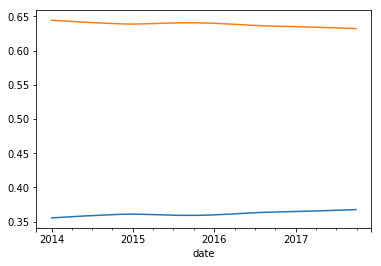

In [49]:
(browser_y[browser_y.se == 'yandex'].hits_year_trend/date_y.hits_year_trend).plot()
(browser_y[browser_y.se == 'search'].hits_year_trend/date_y.hits_year_trend).plot()

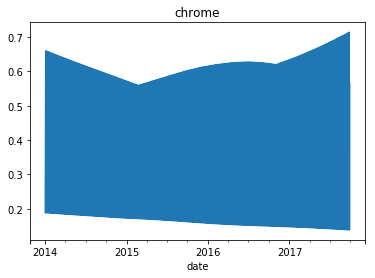

In [64]:
browser_y_chrome = df.iloc[::5,:].groupby(['date', 'se']).sum().reset_index(level=1)
browser_y_chrome.head()
date_y_chrome = browser_y_chrome.groupby(['date']).sum()
date_y_chrome.head()
(browser_y_chrome[browser_y_chrome.se == 'yandex'].hits_year_trend/date_y_chrome.hits_year_trend).plot(title='chrome')


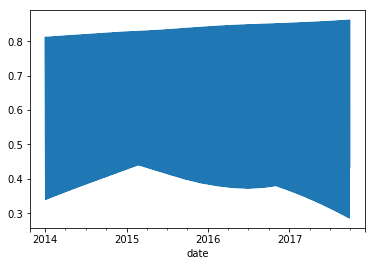

In [65]:
(browser_y_chrome[browser_y_chrome.se == 'search'].hits_year_trend/date_y_chrome.hits_year_trend).plot()



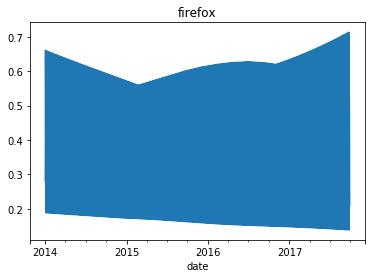

In [74]:
browser_yfirefox = df.iloc[1::5,:].groupby(['date', 'se']).sum().reset_index(level=1)
date_yfirefox = browser_yfirefox.groupby(['date']).sum()
(browser_yfirefox[browser_yfirefox.se == 'yandex'].hits_year_trend/date_yfirefox.hits_year_trend).plot(title='firefox')



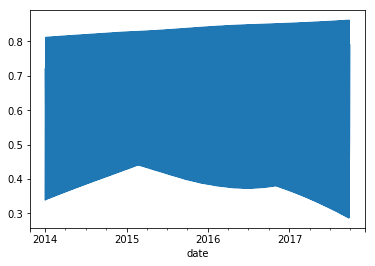

In [76]:
(browser_yfirefox[browser_yfirefox.se == 'search'].hits_year_trend/date_yfirefox.hits_year_trend).plot()

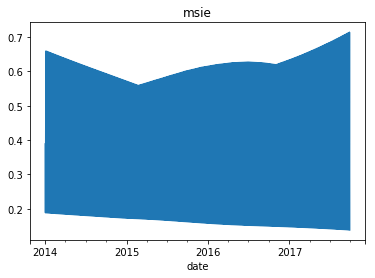

In [77]:
browser_y = df.iloc[2::5,:].groupby(['date', 'se']).sum().reset_index(level=1)
date_y = browser_y.groupby(['date']).sum()
(browser_y[browser_y.se == 'yandex'].hits_year_trend/date_y.hits_year_trend).plot(title='msie')

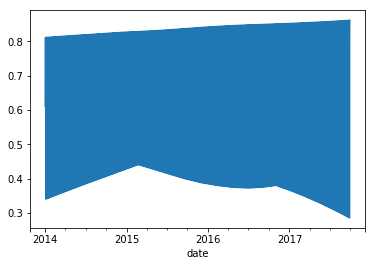

In [69]:
(browser_y[browser_y.se == 'search'].hits_year_trend/date_y.hits_year_trend).plot()

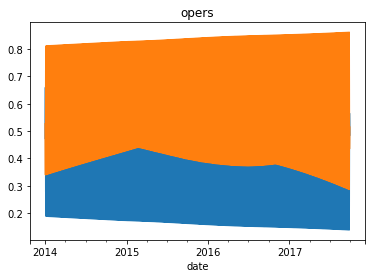

In [36]:
browser_y = df.iloc[3::5,:].groupby(['date', 'se']).sum().reset_index(level=1)
date_y = browser_y.groupby(['date']).sum()
(browser_y[browser_y.se == 'yandex'].hits_year_trend/date_y.hits_year_trend).plot(title='opers')
(browser_y[browser_y.se == 'search'].hits_year_trend/date_y.hits_year_trend).plot()

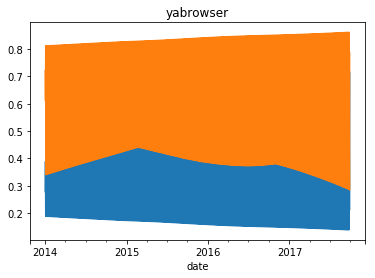

In [37]:
browser_y = df.iloc[4::5,:].groupby(['date', 'se']).sum().reset_index(level=1)
date_y = browser_y.groupby(['date']).sum()
(browser_y[browser_y.se == 'yandex'].hits_year_trend/date_y.hits_year_trend).plot(title='yabrowser')
(browser_y[browser_y.se == 'search'].hits_year_trend/date_y.hits_year_trend).plot()

In [ ]:
 На графиках изображена доля яндекса в разных браузерах, заметно, что суммарно роисковики обганяют ЯНдекс

    Рост виден в Firefox
    Что плохо -- в Яндекс Браузере доля уменьшалась в 2016